In [1]:
import os
import pandas as pd

data_dir = "/home/tomoaki/work/Development/cryptocurrency/data"
filenames = os.listdir(data_dir)
data = {}
for name in filenames:
    if '.csv' in name:
        filepath = os.path.join(data_dir, name)
        df = pd.read_csv(filepath)
        symbol = name.split('.')[0]
        data[symbol] = df
        
shapes =  []
for key in data.keys():
    shapes.append(data[key].shape + (key,))
shapes = sorted(shapes, key=lambda x: x[0], reverse=True)
symbols = [x[2] for x in shapes]

train_data = {}
for symbol in symbols[:10]:
    train_data[symbol] = data[symbol]

In [2]:
from rltensor.environments import TradeEnv
from rltensor.configs import eiie_config
from rltensor.agents import EIIE
import tensorflow as tf


training_start = '2014-11-01 00:00:00'
# training_start = '2015-11-01 00:00:00'
training_end = '2016-09-07 04:00:00'
env = TradeEnv(train_data, start=training_start, end=training_end)

conf = dict(
    action_spec={"type": "float", "shape": env.action_dim},
    state_spec={"type": "float", "shape": (env.action_dim, 3)}
)

default_config = eiie_config()
conf.update(default_config)

fit_config = dict(
    start=training_start,
    end=training_end,
    num_epochs=int(2e6),
    # num_epochs=100,
    log_freq=1000,
    # log_freq = 1
)
    
tf.reset_default_graph()
eiie = EIIE(env=env, **conf)
eiie.fit(**fit_config)

/home/tomoaki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Building tensorflow graph...


640it [00:00, 6393.73it/s]

Finished building tensorflow graph, spent time: 0.4295773506164551
Model saved in file: params/model.ckpt


32452it [00:05, 6458.98it/s]
  0%|          | 0/2000000 [00:00<?, ?it/s]

Finished storing data.


100%|██████████| 2000000/2000000 [4:34:21<00:00, 121.49it/s]  

Model saved in file: params/model.ckpt


In [3]:
test_start = '2016-09-07 04:00:00'
# test_end = '2016-09-17 08:00:00'
test_end = '2016-10-28 08:00:00'


eiie.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path=None,
             overwrite=True,
             log_freq=1,
             avg_length=100)

0it [00:00, ?it/s]

Model saved in file: params/model.ckpt


2456it [00:25, 98.02it/s] 

Model saved in file: params/model.ckpt


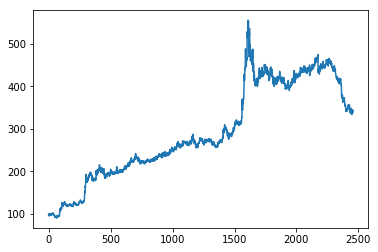

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(eiie.test_cumulative_returns)

In [15]:
df = env.dfs['close']

test_start = '2016-09-07 04:00:00'
# test_end = '2016-09-17 08:00:00'
test_end = '2016-10-28 08:00:00'

df = df.loc[(df.index >= test_start) & (df.index <=  test_end)]

In [27]:
import numpy as np

df_val = df.values / df.values[0] * 100
index = np.argmax(df_val[-1])
best_df = df_val[:, index]

In [46]:
plt.plot(best_df)
# plt.plot(pd.DataFrame(eiie.test_cumulative_returns, index=df.index[1:]))
for i in range(9):
    print(i)
    plt.plot(pd.DataFrame(df_val[:, [i]], index=df.index))

0
1
2
3
4
5
6
7
8


ValueError: ordinal must be >= 1

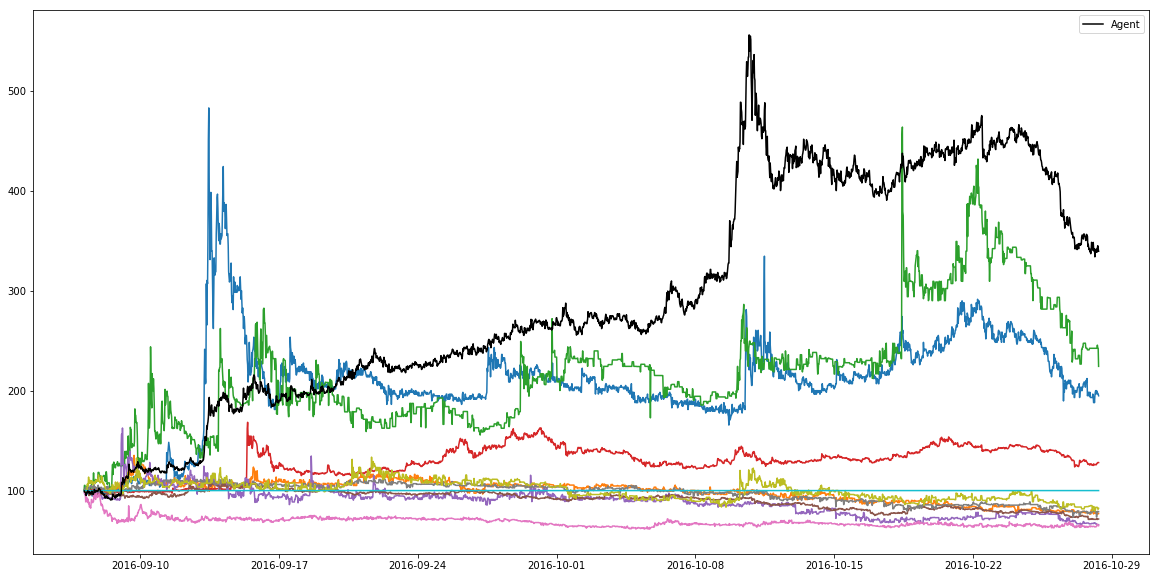

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(pd.DataFrame(df_val[:, 1], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 0], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 2], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 3], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 4], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 5], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 6], index=df.index))
# plt.plot(pd.DataFrame(df_val[:, 7], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 8], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 9], index=df.index))
plt.plot(pd.DataFrame(df_val[:, 10], index=df.index))
plt.plot(pd.DataFrame(eiie.test_cumulative_returns, index=df.index[1:]), color='k', label="Agent")
plt.legend()
plt.savefig('2016-09-07 04:00:00-2016-10-28 08:00:00.png')

In [51]:
df.shape

(2457, 11)